In [2]:
from BlackScholes import *
from localVolPDE import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt

The local volatility function in (4.1) of the MLP paper is:

In [4]:
def lvSPX(mintau):
    
    a = 0.0012
    b =  0.1634
    sig =  0.1029
    rho = -0.5555
    m = 0.0439
    
    # Local volatility
    
    def lv(k,t):
        t = max(t,mintau)
        kp = k/np.sqrt(t)
        v = a + b * (rho * (kp-m) + np.sqrt((kp-m)**2 + sig**2 * t))
        return np.sqrt(abs(v))
        
    return lv

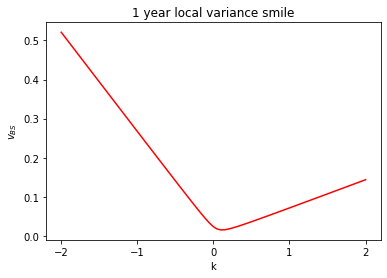

In [5]:
k_array = np.arange(-2,2.05,0.05)

plt.plot(k_array, [lvSPX(mintau=1/250)(x,1)**2 for x in k_array], 'r-')
plt.xticks(np.arange(k_array.min(),k_array.max()))
plt.title("1 year local variance smile")
plt.xlabel("k")
plt.ylabel("$v_{BS}$");

# Numerical PDE computation of implied volatility smile

Adapted from Rolf Poulsen's code.

In this version, sigma is a function of K and t.


In [6]:
sigma = lambda S,t: lvSPX(mintau=1/250)(np.log(S),t)

In [7]:
sigma(1,1)

0.15318234888836593

In [9]:
tt = 1
dt = tt/500
dS = np.sqrt(dt)/10
callValue = lambda k: list(map(lambda k_: callLocalVolPDE(S0=1, K=k_, r=0, q=0, 
                    sigma=sigma, t=tt, dS=dS, dt=dt, sdw=10), k))
impvol = lambda k: BSImpliedVolCall(1,k,tt,0,callValue(k))
k = np.arange(.5,1.5005,.005)
%time volk1 = impvol(k)

'''
tt <- 1
dt <- tt/500
dS <- sqrt(dt)/10
callValue <- function(k){sapply(k,
        function(k){callLocalVolPDE(S0=1, K=k, r=0, q=0, 
                    sigma=sigma, t=tt, dS=dS, dt=dt, sdw=10)})}
impvol <- function(k){BSImpliedVolCall(1,k,tt,0,callValue(k))}
k <- seq(.5,1.5,.005)
system.time(volk1 <- impvol(k))
'''

Wall time: 56min 17s


'\ntt <- 1\ndt <- tt/500\ndS <- sqrt(dt)/10\ncallValue <- function(k){sapply(k,\n        function(k){callLocalVolPDE(S0=1, K=k, r=0, q=0, \n                    sigma=sigma, t=tt, dS=dS, dt=dt, sdw=10)})}\nimpvol <- function(k){BSImpliedVolCall(1,k,tt,0,callValue(k))}\nk <- seq(.5,1.5,.005)\nsystem.time(volk1 <- impvol(k))\n'

'\nplot(k,volk1,type="l",ylab="Implied volatility",xlab="Strike",\n     col="red2", main="T=1")\n'

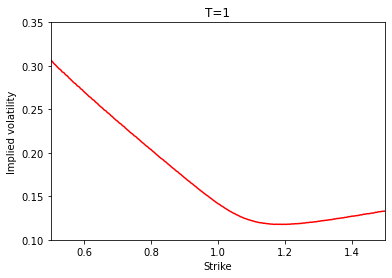

In [15]:
plt.plot(k, volk1, 'r-')
plt.xticks(np.arange(k_array.min(),k_array.max()))
plt.title("T=1")
plt.xlabel("Strike")
plt.ylabel("Implied volatility");
plt.xlim(.5,1.5)
plt.ylim(.1,.35)
plt.xticks([.6,.8,1,1.2,1.4])
'''
plot(k,volk1,type="l",ylab="Implied volatility",xlab="Strike",
     col="red2", main="T=1")
'''